In [1]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

In [2]:
## import table from HFHI
mortgagerelief = pd.read_csv('MRData.csv')
mortgagerelief.head(1)

Affiliate  ID   Loan No  \
0  Aitkin County HFH  (MN)   1  78001567   

   Street Address\r\n(ex: 1234 Five Lane)    City State Abbreviation    Zip  \
0                                     NaN  Aitkin                 MN  56431   

    Sales Price  Closing Date\r\n(mm/yyyy)  Term (Months)  ...  \
0   $ 88,800.00                  9/27/2013          240.0  ...   

  12-month report\r\nFinancial counseling provided during period of mortgage relief  \
0                                                Yes                                  

  12-month report\r\nOther training/support received from HFH?  \
0                                                 No             

  12-month report\r\nDescription of other training received  \
0                                local banker/mentor          

  12-month report\r\nReferrals to other agencies  \
0                                             No   

  12-month report\r\nDescribe referral  \
0                                  NaN   

  12-month report Resident Loan number-referenced) currently residing in home?  \
0                                                Yes                             

  12-month report If resident no longer residing in home, please explain  \
0                                                NaN                       

  12-month report-additional details on titleholders residing in home Note  \
0                                                NaN                   NaN   

      Funds  
0  Thrivent  

[1 rows x 89 columns]

Text(0.5, 1.0, '# in household')

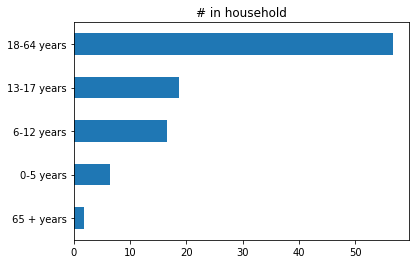

In [13]:
ages = mortgagerelief[["# in household 0-5 years", "# in household 6-12 years", "# in household 13-17 years",
                      "# in household  18-64 years", "# in household 65+ years"]]
ages = ages.fillna(0)
ages = ages.replace({"n/a": 0, "N/A": 0, "Unknown": 0, "Unkown": 0, "same as above file": 0,
                    "No App on File": 0})
ages = ages.rename(columns = {"# in household 0-5 years": "0-5 years", "# in household 6-12 years":"6-12 years", "# in household 13-17 years": "13-17 years",
                      "# in household  18-64 years": "18-64 years", "# in household 65+ years": "65 + years"})
ages = ages.astype(int)
ages = ages.sum(axis = 0)
ages = ages / sum(ages) * 100
ages = ages.sort_values()
ages.plot.barh()
plt.title("# in household")